In [14]:
import numpy as np

np.random.seed(42)

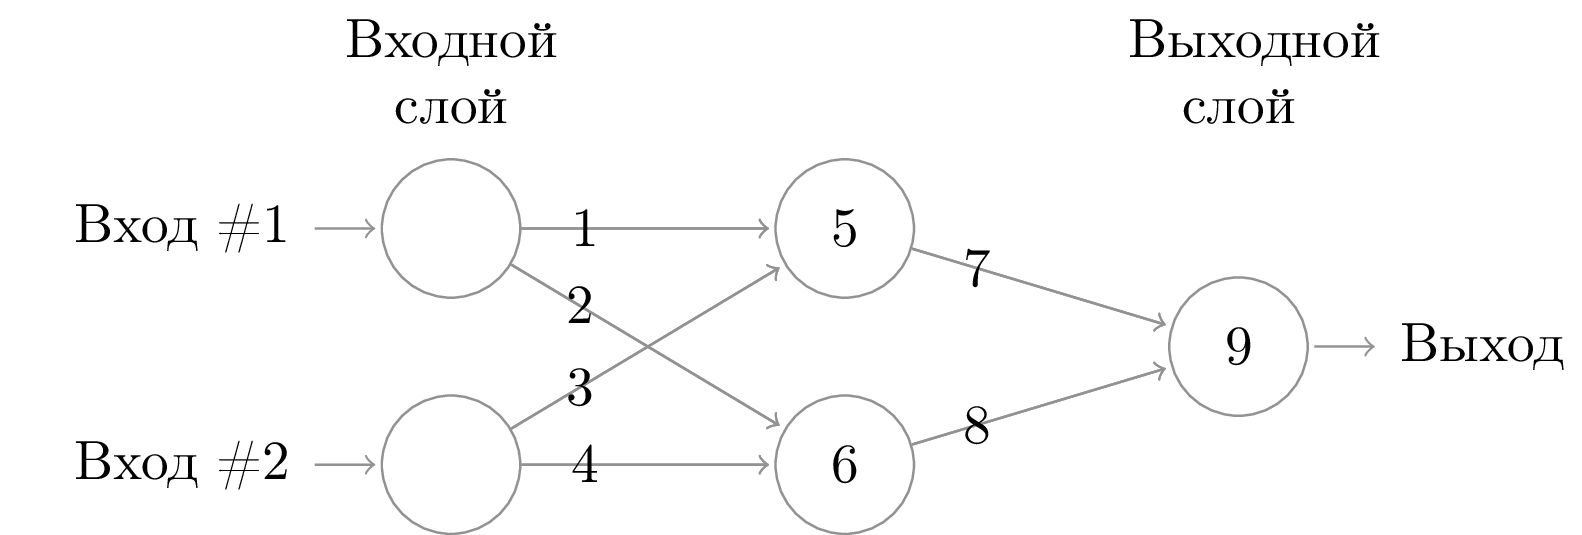

In [15]:
# Task is to represent XOR with simple multilayer perceptron (with out common back propagation algorithm)

from IPython.display import Image
Image(filename='xor_network_scheme.png')

# a Xor b = (!a && b) || (a && !b)
# so required multilayer perceptron could be represented as combination of three simple perceptrons:
# 1) P_1 = (!a && b)
# 2) P_2 = (a && !b)
# 3) P_3 = (a || b)

In [16]:
class Perceptron:

    def __init__(self, w, b):
        """
        shape(w) == (m, 1)
        """
        
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        shape(single_input) == (m, 1)
        """
        
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b
        
        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        shape(input_matrix) == (n, m)
        shape(result_matrix) == (n, 1)
        """
        return input_matrix.dot(self.w) + self.b > 0
    
    def train_on_single_example(self, example, y):
        """
        shape(example) == (m, 1)        
        """
        y_diff = y - self.vectorized_forward_pass(example.T)
        self.w += y_diff * example
        self.b += y_diff
        return abs(y_diff)
    
    def train_until_convergence(self, input_matrix, y, max_steps=1e8):
        """
        shape(input_matrix) == (n, m)
        shape(y) == (n, 1)
        """
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                example = example.reshape((example.size, 1))
                error = self.train_on_single_example(example, answer)
                errors += int(error)  # int(True) = 1, int(False) = 0, так что можно не делать if

In [17]:
def create_perceptron(m):
    """Создаём перцептрон со случайными весами и m входами"""
    w = np.random.random((m, 1))
    return Perceptron(w, 1)

In [34]:
# P_1 = (!a && b)
P_1_data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 0], [1, 1, 0]])
P_1 = create_perceptron(2)
P_1.train_until_convergence(input_matrix=P_1_data[:, :-1], y=P_1_data[:, -1][:,np.newaxis])
print(P_1.w, P_1.b)

# P_1 = (a && !b)
P_2_data = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 0]])
P_2 = create_perceptron(2)
P_2.train_until_convergence(input_matrix=P_2_data[:, :-1], y=P_2_data[:, -1][:,np.newaxis])
print(P_2.w, P_2.b)

# P_3 = P_1 || P_2
P_3_data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
P_3 = create_perceptron(2)
P_3.train_until_convergence(input_matrix=P_3_data[:, :-1], y=P_3_data[:, -1][:,np.newaxis])
print(P_3.w, P_3.b)

(array([[-1.45328972],
       [ 1.18485446]]), array([[0]]))
(array([[ 1.96958463],
       [-2.22486718]]), array([[0]]))
(array([[ 0.93949894],
       [ 0.89482735]]), array([[0]]))


In [56]:
P_data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
err = 0
for example in P_data:
    y_hat_P_1 = P_1.vectorized_forward_pass(example[:-1])
    y_hat_P_2 = P_2.vectorized_forward_pass(example[:-1])
    y_diff = example[2:] - P_3.vectorized_forward_pass(np.append(y_hat_P_1, y_hat_P_2))
    err += y_diff
print(err)

[[0]]
